<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

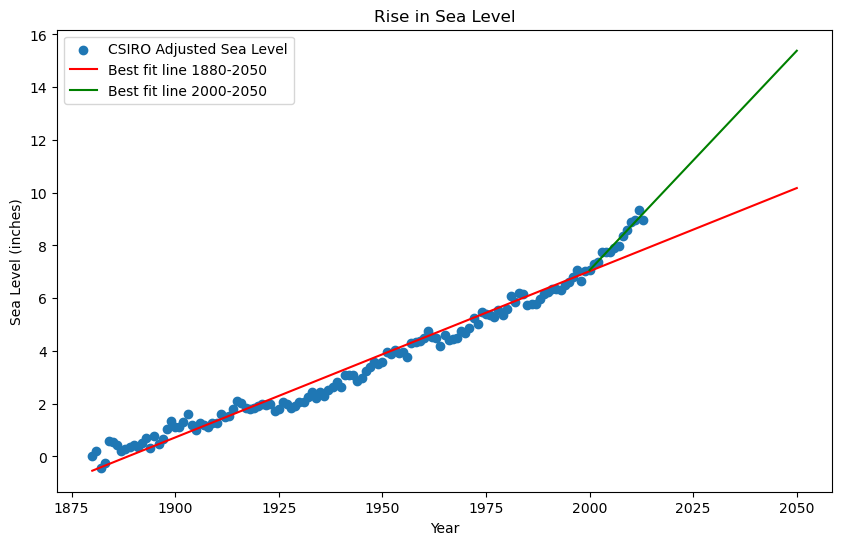

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(data=df, x='Year', y='CSIRO Adjusted Sea Level')

    # Create first line of best fit
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    x_pred = pd.Series([i for i in range(1880, 2051)])
    y_pred = slope * x_pred + intercept         # y=mx+c
    plt.plot(x_pred, y_pred, color='red', label='Best fit line 1880-2050')
    
    # Create second line of best fit
    df_recent = df[df['Year'] >= 2000]
    slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(df_recent['Year'], 
                                                                                                df_recent['CSIRO Adjusted Sea Level'])
    x_pred_recent = pd.Series([i for i in range(2000, 2051)])
    y_pred_recent = slope_recent * x_pred_recent + intercept_recent
    plt.plot(x_pred_recent, y_pred_recent, color='green', label='Best fit line 2000-2050')
    
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

draw_plot()